[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv10 Object Detection on a Custom Dataset

---

[![arXiv](https://img.shields.io/badge/arXiv-2405.14458-b31b1b.svg)](https://arxiv.org/pdf/2405.14458.pdf)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/THU-MIG/yolov10)
[![Hugging Face Spaces](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue)](https://huggingface.co/spaces/SkalskiP/YOLO-ARENA)

YOLOv10 is a new generation in the YOLO series for real-time end-to-end object detection. It aims to improve both the performance and efficiency of YOLOs by eliminating the need for non-maximum suppression (NMS) and optimizing model architecture comprehensively. This advancement reduces computational overhead, enhancing both efficiency and capability. YOLOv10 shows state-of-the-art performance and efficiency, with YOLOv10-S being 1.8 times faster than RT-DETR-R18 and having significantly fewer parameters and FLOPs. Additionally, YOLOv10-B demonstrates 46% less latency and 25% fewer parameters compared to YOLOv9-C while maintaining the same performance.

<p align="center">
  <img src="https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/yolov10_latency.svg" width=48%>
  <img src="https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/yolov10_params.svg" width=48%> <br>
  Comparisons with others in terms of latency-accuracy (left) and size-accuracy (right) trade-offs.
</p>

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv10
- Download pre-trained weights
- Download example data
- Inference with Pre-trained COCO Model
- Download dataset from Roboflow Universe
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Fri May 31 22:34:18 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.85                 Driver Version: 555.85         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 Ti   WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   51C    P8             11W /  165W |     957MiB /  16380MiB |     18%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = "."
print(HOME)

.


## Install YOLOv10

**NOTE:** Currently, YOLOv10 does not have its own PyPI package. Therefore, we need to install the code from the source.

In [3]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

**NOTE:** We will also install two additional packages: [`roboflow`](https://github.com/roboflow/roboflow-python) to download the dataset from [Roboflow Universe](https://universe.roboflow.com/), which we will use to train our model, and [`supervision`](https://github.com/roboflow/supervision), which we will use for visualizing the results.

In [4]:
!pip install -q supervision roboflow

## Download pre-trained weights

**NOTE:** YOLOv10 provides weight files pre-trained on the COCO dataset in various sizes. Let's download them.

In [5]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
# !ls -lh {HOME}/weights

The syntax of the command is incorrect.


^C


## Download example data

**NONE:** Let's download few example images. Feel free to use your images or videos.

In [ ]:
!mkdir -p {HOME}/data
# !wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg
# !ls -lh {HOME}/data

The syntax of the command is incorrect.
'ls' is not recognized as an internal or external command,
operable program or batch file.


## Inference with Pre-trained COCO Model

**NOTE:** YOLOv10 is based on YOLOv8, and like YOLOv8, it can be used in both CLI and SDK modes.

### 💻 CLI

In [6]:
%cd {HOME}

!yolo task=detect mode=predict conf=0.25 save=True \
model=./weights/yolov10n.pt \
source=./data/inside-view.png

e:\programming\AquaCulture
Ultralytics YOLOv8.1.34 🚀 Python-3.10.14 torch-2.3.0+cpu CPU (13th Gen Intel Core(TM) i5-13400F)
YOLOv10n summary (fused): 285 layers, 2762608 parameters, 63840 gradients, 8.6 GFLOPs

image 1/1 e:\programming\AquaCulture\data\inside-view.png: 320x640 3 birds, 219.2ms
Speed: 15.6ms preprocess, 219.2ms inference, 11.6ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs\detect\predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NONE:** Let's display result.

e:\programming\AquaCulture


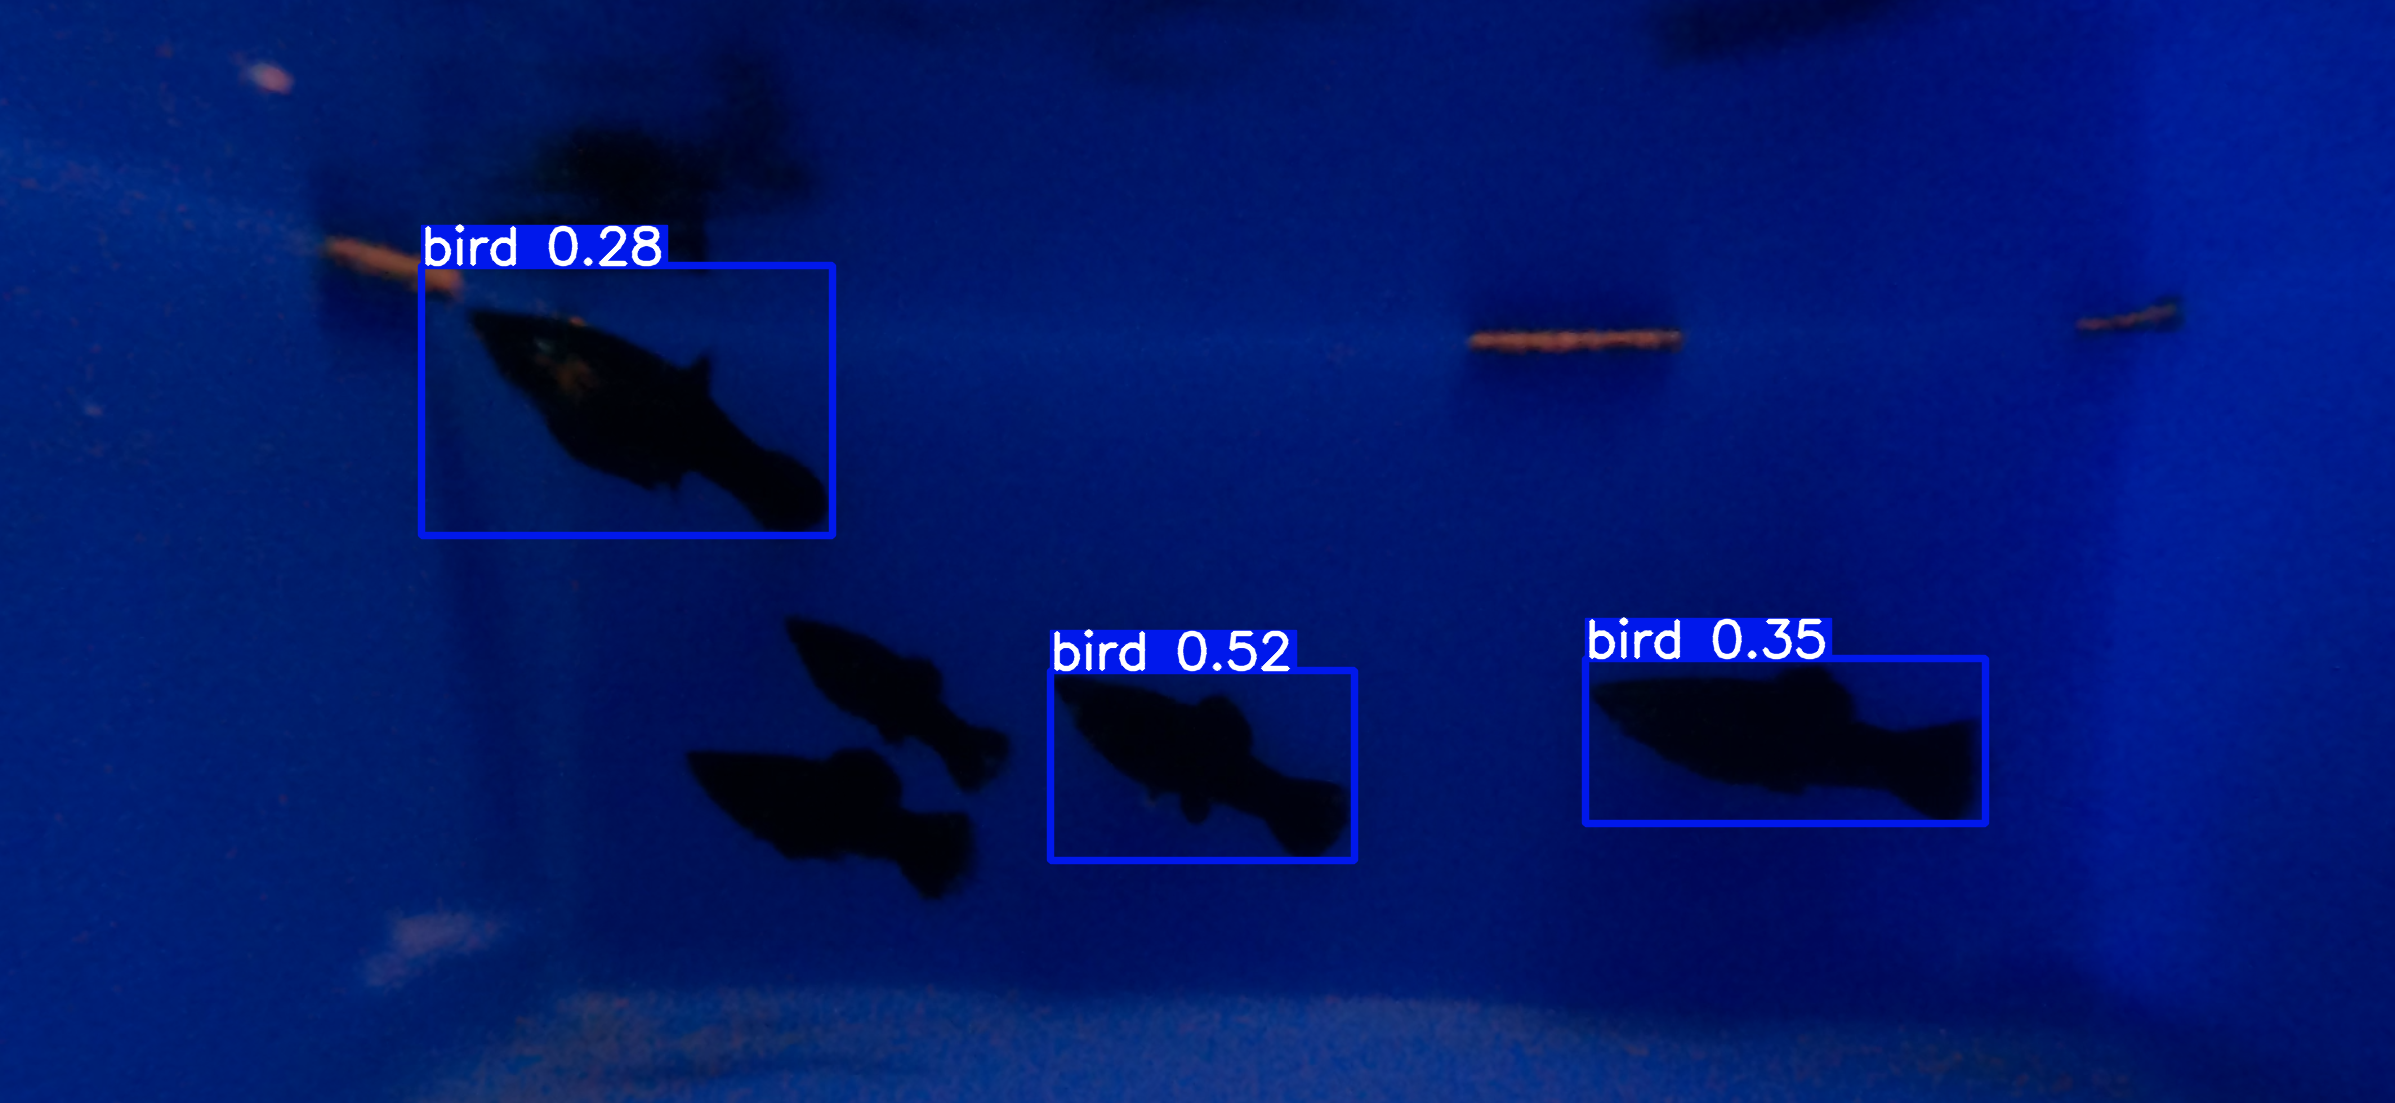

In [7]:
%cd {HOME}

from IPython.display import Image

Image(filename='runs/detect/predict/inside-view.png', height=600)

### 🐍 Python SDK

In [8]:
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
results = model(source=f'{HOME}/data/inside-view.png', conf=0.25)


image 1/1 e:\programming\AquaCulture\data\inside-view.png: 320x640 3 birds, 162.4ms
Speed: 4.1ms preprocess, 162.4ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 640)


In [10]:
results[0].boxes.xyxy

tensor([[6.7041e+01, 2.5264e+02, 6.4549e+02, 9.6621e+02],
        [7.4646e-01, 3.4156e+02, 5.4170e+02, 1.2773e+03]], device='cuda:0')

In [11]:
results[0].boxes.conf

tensor([0.5090, 0.3536], device='cuda:0')

In [12]:
results[0].boxes.cls

tensor([16.,  0.], device='cuda:0')

**NONE:** Let's display result using `supervision`.


0: 320x640 3 birds, 135.3ms
Speed: 0.0ms preprocess, 135.3ms inference, 4.6ms postprocess per image at shape (1, 3, 320, 640)


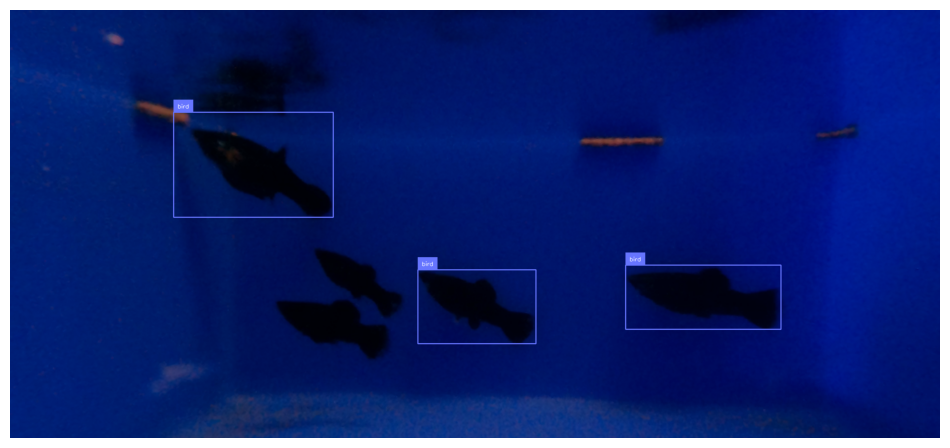

In [10]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
image = cv2.imread(f'{HOME}/data/inside-view.png')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

## Download dataset from Roboflow Universe

In [14]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install -q roboflow

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("selencakmak").project("tumor-dj2a1")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Tumor-1 in yolov8:: 100%|██████████| 3006/3006 [00:00<00:00, 5116.03it/s]


**NOTE:**
Make sure the last 4 lines of the data.yaml file have the following format:

```
test: ../test/images
train: ../train/images
val: ../valid/images
```

If using a dataset from Roboflow Universe, run the command below. 👇🏻

In [15]:
# !sed -i '$d' {dataset.location}/data.yaml
# !sed -i '$d' {dataset.location}/data.yaml
# !sed -i '$d' {dataset.location}/data.yaml
# !sed -i '$d' {dataset.location}/data.yaml
# !echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

## Custom Training

In [11]:
%cd {HOME}

!yolo task=detect mode=train epochs=30 batch=32 plots=True \
model=./weights/yolov10n.pt  data=./data.yaml 

e:\programming\AquaCulture
New https://pypi.org/project/ultralytics/8.2.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.14 torch-2.3.0+cpu CPU (13th Gen Intel Core(TM) i5-13400F)
engine\trainer: task=detect, mode=train, model=./weights/yolov10n.pt, data=./data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti


  0%|          | 0.00/755k [00:00<?, ?B/s]
 51%|█████     | 384k/755k [00:00<00:00, 1.81MB/s]
100%|██████████| 755k/755k [00:00<00:00, 2.58MB/s]

train: Scanning E:\programming\AquaCulture\train\labels...:   0%|          | 0/227 [00:00<?, ?it/s]
train: Scanning E:\programming\AquaCulture\train\labels... 29 images, 0 backgrounds, 0 corrupt:  13%|█▎        | 29/227 [00:00<00:00, 283.50it/s]
train: Scanning E:\programming\AquaCulture\train\labels... 63 images, 0 backgrounds, 0 corrupt:  28%|██▊       | 63/227 [00:00<00:00, 306.82it/s]
train: Scanning E:\programming\AquaCulture\train\labels... 95 images, 0 backgrounds, 0 corrupt:  42%|████▏     | 95/227 [00:00<00:00, 305.75it/s]
train: Scanning E:\programming\AquaCulture\train\labels... 135 images, 0 backgrounds, 0 corrupt:  59%|█████▉    | 135/227 [00:00<00:00, 340.07it/s]
train: Scanning E:\programming\AquaCulture\train\labels... 177 images, 0 backgrounds, 0 corrupt:  78%|███████▊  | 177/227 [00:00<00:00, 367.80it/s]
train: Scanning E:\

In [17]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1716829751.122067014f9f.1155.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


e:\programming\AquaCulture


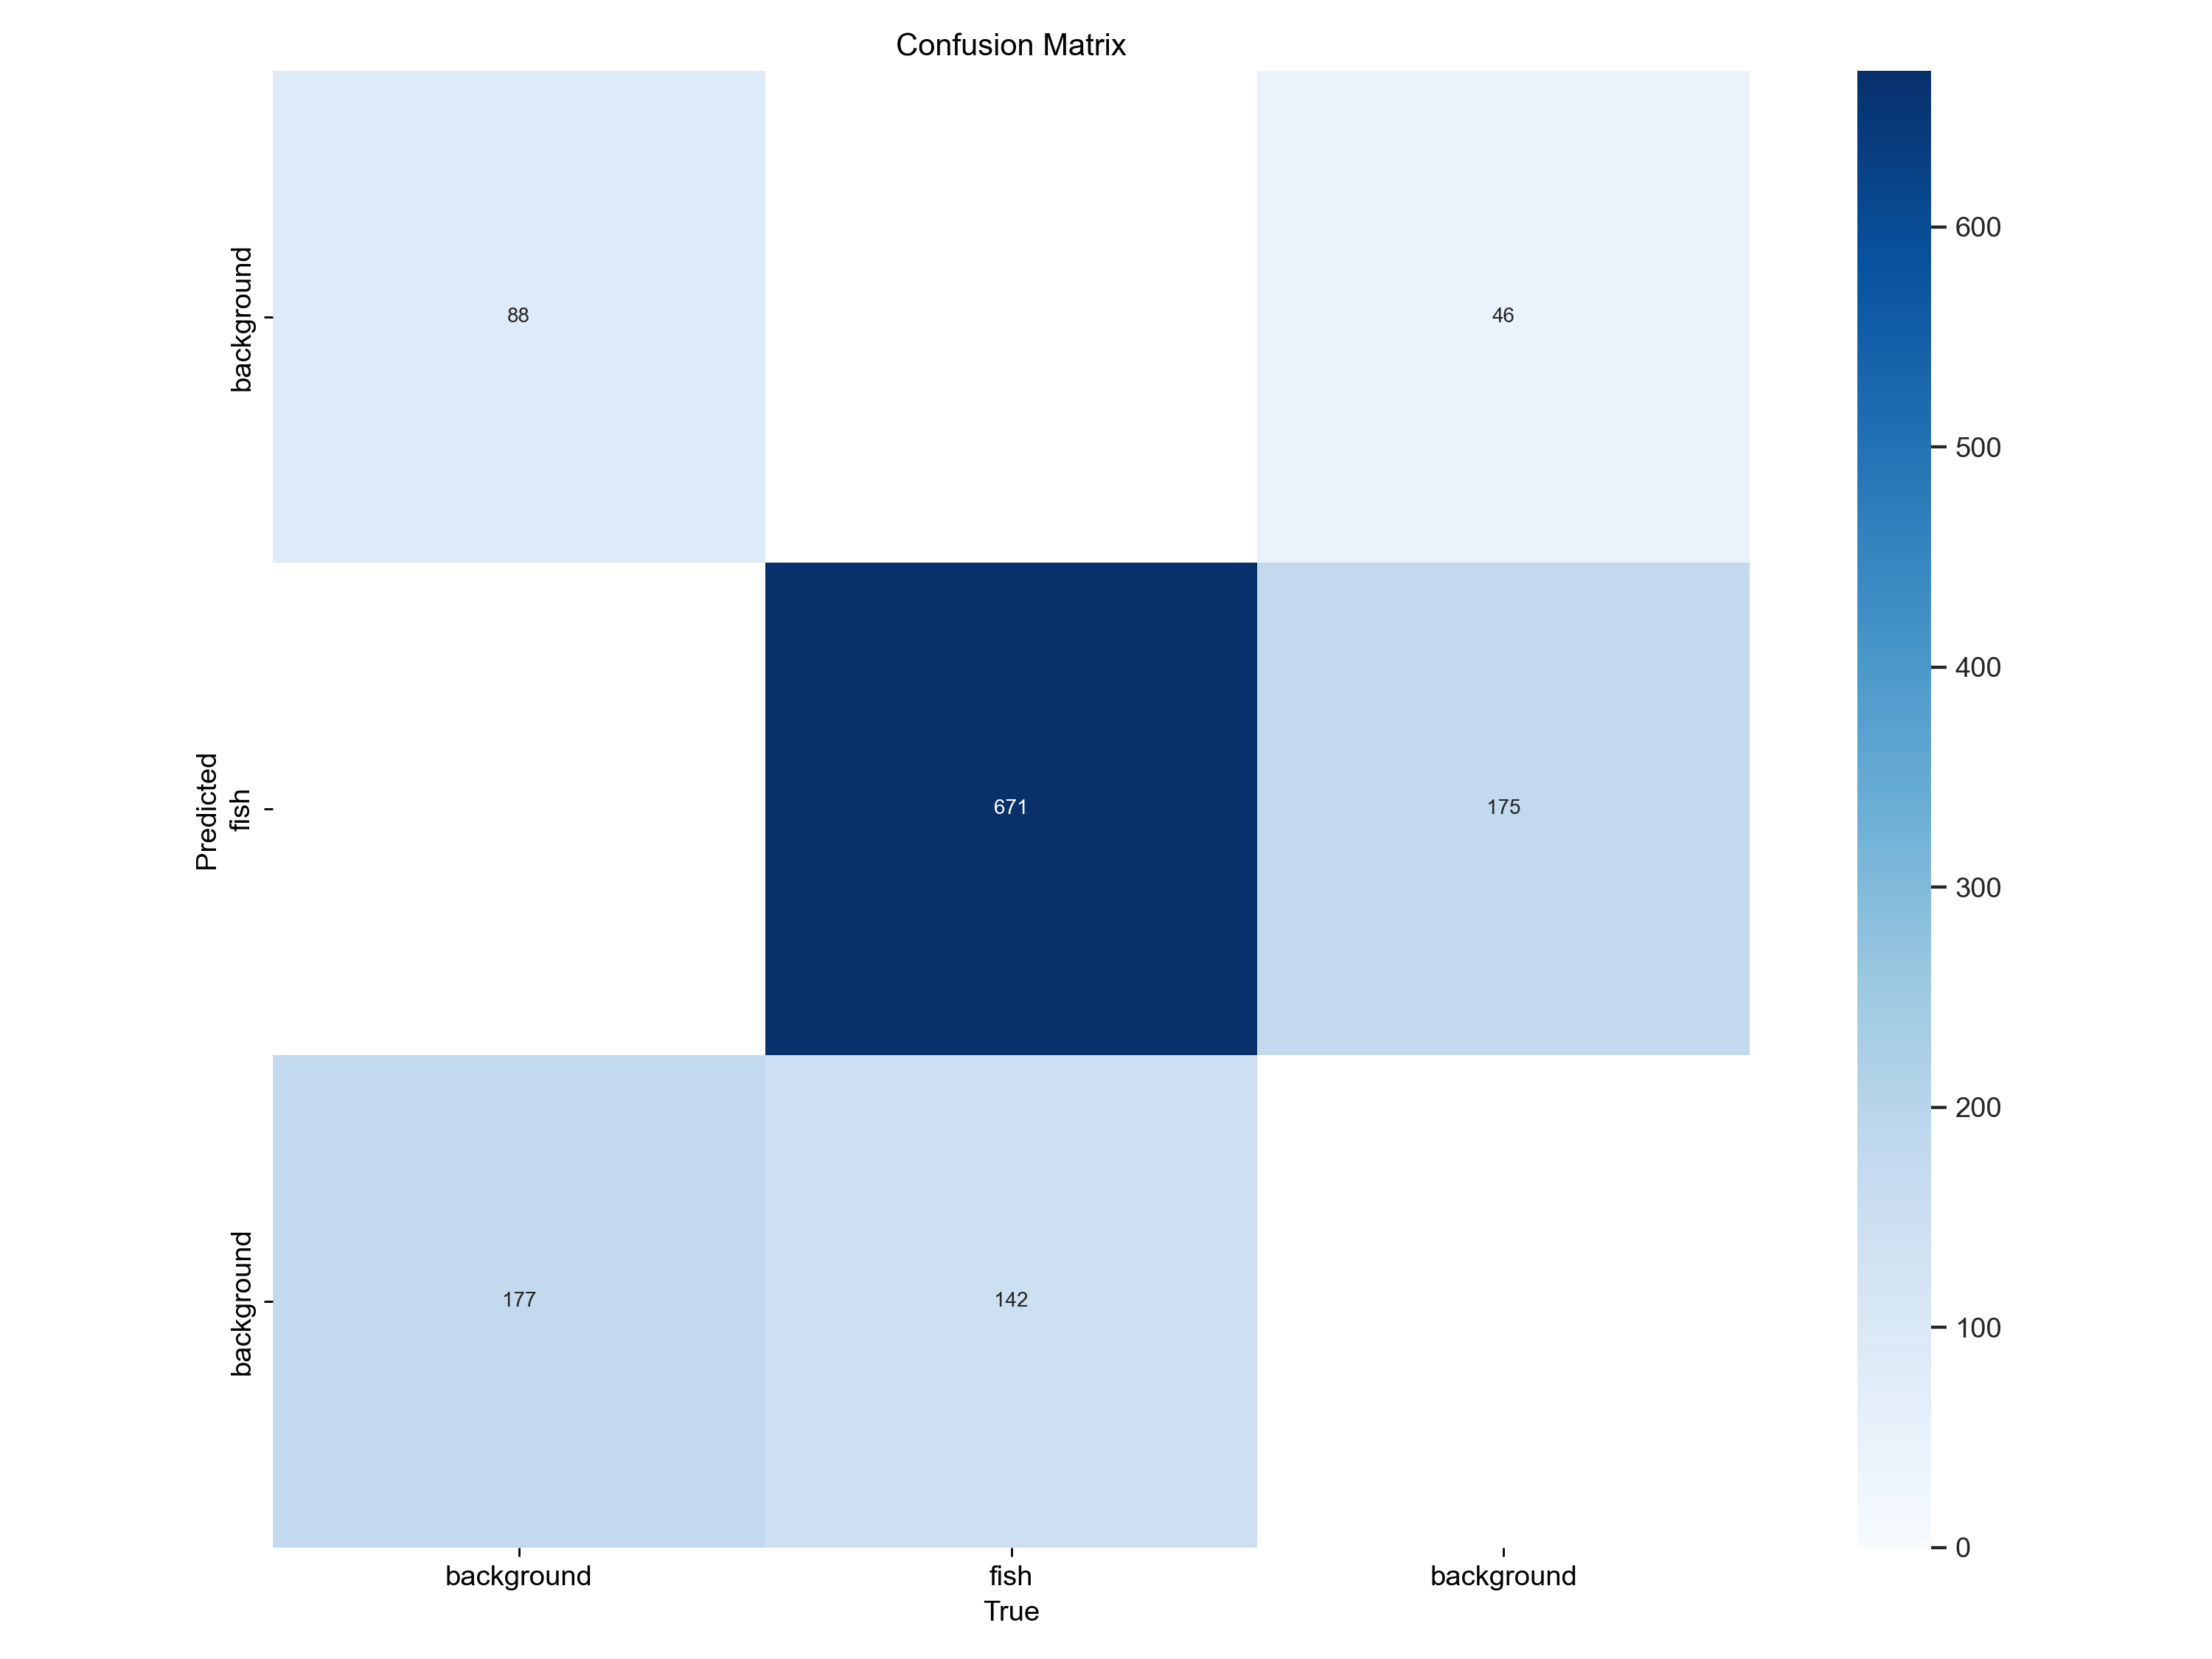

In [13]:
%cd {HOME}
Image(filename=f'./runs/detect/train/confusion_matrix.png', width=600)

e:\programming\AquaCulture


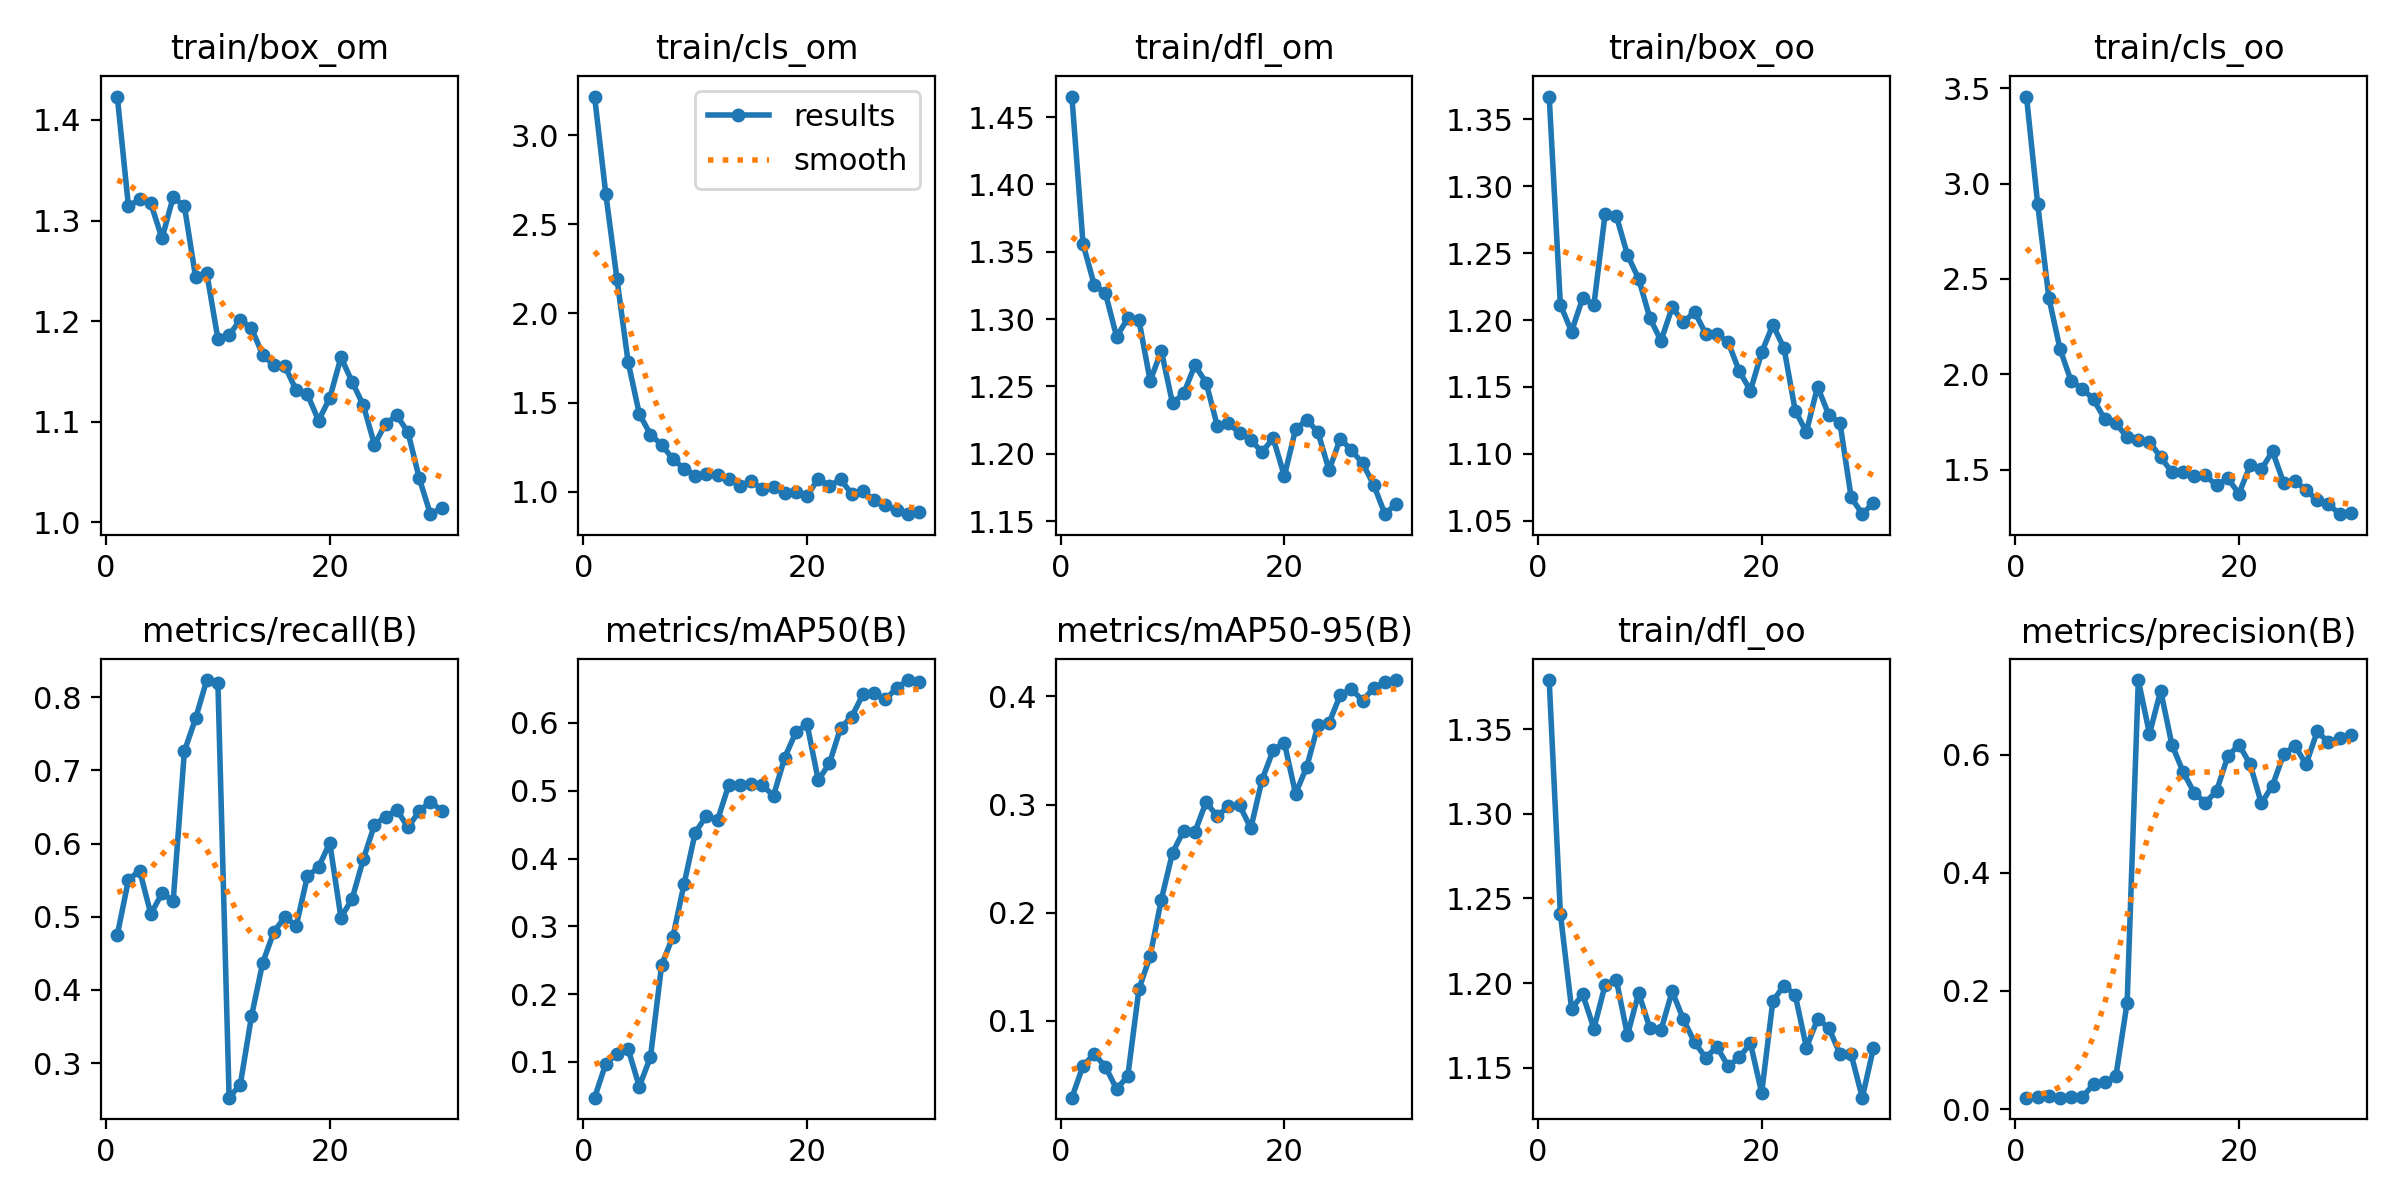

In [12]:
%cd {HOME}
Image(filename=f'./runs/detect/train/results.png', width=1200)

## Inference with Custom Model

**NOTE:** Let's start by loading our newly trained model.

In [14]:
from ultralytics import YOLOv10

model = YOLOv10(f'./runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"./valid/images",
    annotations_directory_path=f"./valid/labels",
    data_yaml_path=f"./data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

**NOTE:** Let's randomly select an image from our validation set and visualize the results.


0: 640x640 1 background, 18 fishs, 213.9ms
Speed: 3.7ms preprocess, 213.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


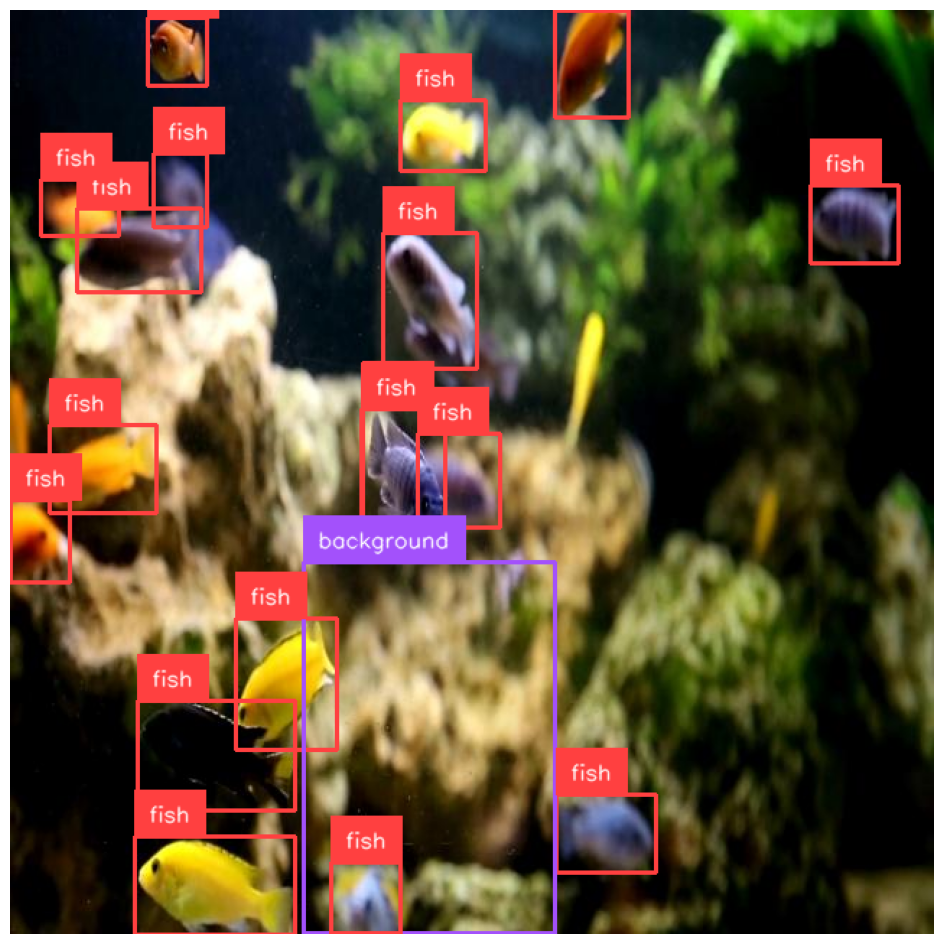

: 

In [16]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('./runs/detect/train/weights/best.pt')  # load a pretrained model (recommended for training)

# Train the model with 2 GPUs
results = model.train(data="./data.yaml", epochs=100, imgsz=640, device=0)